In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Data Preprocessing:

In [3]:
df = pd.read_csv('anime.csv')

In [4]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
df.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [7]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [8]:
df['genre'].value_counts()

genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Hentai, Parody, Sci-Fi                                    1
Hentai, Historical, Mystery                               1
Action, Comedy, Hentai                                    1
Comedy, Ecchi, Fantasy, Parody, Yuri                      1
Action, Mecha, Military, School, Sci-Fi, Super Power      1
Name: count, Length: 3264, dtype: int64

In [9]:
df['genre'].describe()

count      12232
unique      3264
top       Hentai
freq         823
Name: genre, dtype: object

In [40]:
df['genre'] = df['genre'].fillna('Unknown') #i am replacing null genre with most frequent genre in the genre category 
# we can use apriori here to be more specfic with the genre like we have hentai combination with other genres too.
# in my opinion it is best to drop them for the bettermenrt for othe valid dataset since 0.5% of the data 

In [11]:
(62/12294)* 100 

0.504311046038718

In [12]:
df['genre'].count()

np.int64(12232)

In [13]:
df['type'].value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

In [14]:
df['type'].describe()

count     12269
unique        6
top          TV
freq       3787
Name: type, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [16]:
df2 = df.dropna(subset=['type'])

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12269 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12269 non-null  int64  
 1   name      12269 non-null  object 
 2   genre     12210 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12269 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12269 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 766.8+ KB


In [18]:
df['rating']

0        9.37
1        9.26
2        9.25
3        9.17
4        9.16
         ... 
12289    4.15
12290    4.28
12291    4.88
12292    4.98
12293    5.46
Name: rating, Length: 12294, dtype: float64

In [19]:
df['rating'].isnull().sum()

np.int64(230)

In [20]:
df['rating'].describe()

count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

In [21]:
df['rating'].median()

6.57

In [22]:
df['rating'].mode()  # mode 

0    6.0
Name: rating, dtype: float64

In [23]:
df['rating'].skew()

np.float64(-0.5435700688578503)

<Axes: >

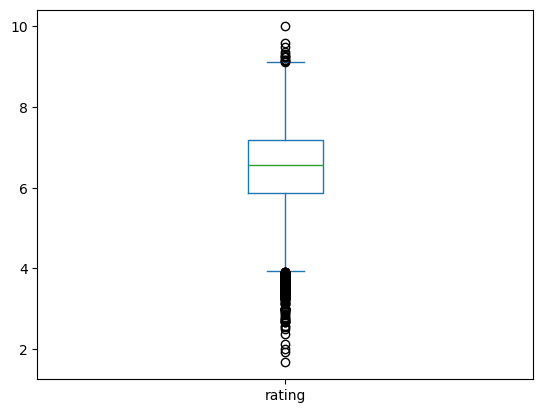

In [24]:
df['rating'].plot(kind ='box')

In [25]:
df['rating'].value_counts()

rating
6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
2.98      1
3.44      1
1.92      1
2.86      1
3.14      1
Name: count, Length: 598, dtype: int64

In [26]:
# Ensure numeric type
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Fill null with median (correct way)
df['rating'] = df['rating'].fillna(df['rating'].median())



In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [28]:
df3 = df.dropna(subset=['type'])

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12269 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12269 non-null  int64  
 1   name      12269 non-null  object 
 2   genre     12210 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12269 non-null  object 
 5   rating    12269 non-null  float64
 6   members   12269 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 766.8+ KB


In [30]:
df3.to_csv('Cleaned_data.csv', index = False)

In [31]:
df3[df3['anime_id'] == 34492] # i guess the episode unknow should not create any problem in recomendation system 
# since genre , type , rating and members plays important role compare to episode.

,anime_id,name,genre,type,episodes,rating,members
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,6.57,392


In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12269 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12269 non-null  int64  
 1   name      12269 non-null  object 
 2   genre     12210 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12269 non-null  object 
 5   rating    12269 non-null  float64
 6   members   12269 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 766.8+ KB


In [43]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("cleaned_data.csv")


In [44]:
# Feature Extraction:
# Convert genres to list
df['genre'] = df['genre'].apply(lambda x: x.split(',') if isinstance(x, str) else ['Unknown'])

# One-hot encoding for genres
mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(df['genre']), columns=mlb.classes_, index=df.index)

# Combine with rating
df_features = pd.concat([genre_features, df[['rating']]], axis=1)

# Normalize rating
scaler = StandardScaler()
df_features['rating'] = scaler.fit_transform(df_features[['rating']])

In [45]:
# 3. Recommendation System:

# Cosine similarity matrix
similarity_matrix = cosine_similarity(df_features)

# Function to recommend anime
def recommend_anime(anime_title, top_n=5, threshold=0.2):
    if anime_title not in df['name'].values:
        return f"Anime '{anime_title}' not found in dataset."
    
    idx = df[df['name'] == anime_title].index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    
    # Apply threshold
    sim_scores = [(i, score) for i, score in sim_scores if score >= threshold]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the anime itself
    sim_scores = [s for s in sim_scores if s[0] != idx][:top_n]
    
    anime_indices = [i[0] for i in sim_scores]
    return df['name'].iloc[anime_indices].tolist()

# Example Recommendation
print("Recommendations for 'Naruto':", recommend_anime("Naruto", top_n=5))


Recommendations for 'Naruto': ['Naruto: Shippuuden', 'Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi', 'Boruto: Naruto the Movie', 'Naruto x UT', 'Naruto: Shippuuden Movie 4 - The Lost Tower']


In [46]:
# 4. Evaluation (Simple Version)

# Split dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Dummy evaluation: precision & recall based on genre overlap
def evaluate():
    relevant = 0
    recommended = 0
    possible = 0
    
    for _, row in test_df.iterrows():
        recs = recommend_anime(row['name'], top_n=5)
        if isinstance(recs, list):
            recommended += len(recs)
            possible += 5
            overlap = len(set(recs).intersection(set(train_df['name'].values)))
            relevant += overlap
    
    precision = relevant / recommended if recommended > 0 else 0
    recall = relevant / possible if possible > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0
    
    return precision, recall, f1

precision, recall, f1 = evaluate()
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

Precision: 0.80, Recall: 0.80, F1: 0.80
